# Homework Lessons 5 - 6

In [136]:
import pandas as pd
import numpy as np 
import scipy

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Урок 5

#####  1 . Вектор – это частный случай матрицы 1хN и Nх1. Повторите материал для векторов, уделяя особое внимание умножению A∙B. Вычислите, по возможности не используя программирование: (5Е) **(– 1), где Е – единичная матрица размера 5х5.


In [137]:
A, B  = np.array([[2, 5, 8]]), np.array([[1, 9, -4]])
A , B 

(array([[2, 5, 8]]), array([[ 1,  9, -4]]))

In [138]:
A * B

array([[  2,  45, -32]])

In [139]:
A * B.T

array([[  2,   5,   8],
       [ 18,  45,  72],
       [ -8, -20, -32]])

In [140]:
A.T * B

array([[  2,  18,  -8],
       [  5,  45, -20],
       [  8,  72, -32]])

In [141]:
A.T * B.T

array([[  2],
       [ 45],
       [-32]])

In [142]:
E = np.identity(5)
E

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [176]:
(5 * E) 

array([[5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5.]])

In [177]:
np.linalg.inv(5*E)

array([[0.2, 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.2]])

##### 2. Вычислите определитель:

$
\begin{align}
\begin{vmatrix}
1 & 2 & 3 \\
4 & 0 & 6 \\
7 & 8 & 9 
\end{vmatrix}
\end{align}
$

In [144]:
A = np.array([1,2,3,4,0,6,7,8,9]).reshape((3,-3))
A

array([[1, 2, 3],
       [4, 0, 6],
       [7, 8, 9]])

In [145]:
def manual_det(m):
    if m.shape == (1,1):
        return m[0,0]
    if m.shape ==(2, 2):
        return m[0, 0] * m[1, 1] - m[0, 1] * m[1, 0]
    ans, flag , temp_m = 0, 1, np.delete(m, 0, 0)
    for i, j in enumerate(m[0]):
        ans += j * (manual_det(np.delete(temp_m, i, 1))) * flag
        flag *= -1
    return ans

In [146]:
print(f"Manual Determinant(A) = {manual_det(A)}")
print(f"Linalg Determinant(A) = {np.linalg.det(A)}")

Manual Determinant(A) = 60
Linalg Determinant(A) = 59.999999999999986


In [147]:
test = np.random.randint(-10, 10,(8, 8))
print("Testing big matrix:\n",test,"\n")
print(f"Manual Determinant(test) = {manual_det(test)}")
print(f"Linalg Determinant(test) = {np.linalg.det(test)}")

Testing big matrix:
 [[ -4   1  -3  -1   0 -10  -5  -2]
 [ -3   3   9   1  -8  -8  -8   2]
 [  9   9  -3  -4   0  -3 -10  -4]
 [ -8   0  -6   4   2  -5  -1   9]
 [-10   9  -4  -7  -6  -3   7  -9]
 [ -9   8  -1   5   9   3   0   3]
 [ -3   2   0   2   8   2   4  -2]
 [  8   3  -6  -4  -6   8  -3  -1]] 

Manual Determinant(test) = 16991256
Linalg Determinant(test) = 16991256.000000034


##### 3. Вычислите матрицу, обратную данной:

$
\begin{align}
\begin{vmatrix}
1 & 2 & 3 \\
4 & 0 & 6 \\
7 & 8 & 9 
\end{vmatrix}
\end{align}
$

In [148]:
def manual_inv(m):
    minors = m.copy()
    flag = 1
    for i in range (len(m)):
        for j in range (len(m[0])):
            temp_m = np.delete(np.delete(m, i, 0), j, 1)
            minors[i,j] = manual_det(temp_m) * flag
            flag *= -1
    return minors.T/manual_det(m)
        
        

In [149]:
print(f"Manual inversion(A):\n{manual_inv(A)}\n")
print(f"Linalg inversion(A):\n{np.linalg.inv(A)}\n")

Manual inversion(A):
[[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]

Linalg inversion(A):
[[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]



In [150]:
test = np.random.randint(0, 10,(7, 7))
print("Testing big matrix:\n",test,"\n")
print(f"Manual inversion(test):\n{np.round(manual_inv(test),2)}\n")
print(f"Linalg inversion(test):\n{np.round(np.linalg.inv(test),2)}\n")

Testing big matrix:
 [[2 3 2 4 9 6 4]
 [0 4 5 6 8 0 2]
 [6 6 6 0 6 1 7]
 [0 0 1 7 3 6 3]
 [0 4 1 4 0 9 2]
 [8 1 9 6 3 8 1]
 [3 4 7 3 7 3 7]] 

Manual inversion(test):
[[ 0.02 -0.02  0.21  0.11 -0.07  0.06 -0.25]
 [-0.04  0.11  0.13 -0.05  0.13 -0.03 -0.15]
 [-0.06  0.01 -0.17 -0.14  0.03  0.05  0.25]
 [-0.1   0.1   0.11  0.2  -0.03  0.   -0.16]
 [ 0.15  0.01 -0.06 -0.08 -0.05  0.    0.02]
 [ 0.09 -0.07 -0.11 -0.09  0.07  0.02  0.09]
 [-0.07 -0.09  0.06  0.15 -0.04 -0.07  0.1 ]]

Linalg inversion(test):
[[ 0.02 -0.02  0.21  0.11 -0.07  0.06 -0.25]
 [-0.04  0.11  0.13 -0.05  0.13 -0.03 -0.15]
 [-0.06  0.01 -0.17 -0.14  0.03  0.05  0.25]
 [-0.1   0.1   0.11  0.2  -0.03  0.   -0.16]
 [ 0.15  0.01 -0.06 -0.08 -0.05  0.    0.02]
 [ 0.09 -0.07 -0.11 -0.09  0.07  0.02  0.09]
 [-0.07 -0.09  0.06  0.15 -0.04 -0.07  0.1 ]]



##### 4. Приведите пример матрицы 4х4, ранг которой равен 1.

In [261]:
def manual_rank(m):
    for i in range(min(len(m), len(m[0])), 0, -1):
        for row in range (len(m) - i +1):
            for column in range (len(m[0]) - i +1):
                if manual_det(m[row : row + i, column : column + i]) != 0:
                    return i
    return 0

In [262]:
# testing 
for i in range (30):
    test_m = np.random.randint(-10, 10,(np.random.randint(1,6), (np.random.randint(1,6))))
    m_rank = manual_rank(test_m)
    if m_rank != np.linalg.matrix_rank(test_m):
        assert False
print("All test done !")                       

All test done !


In [263]:
A = np.array([[1,1,1],[1,1,1],[1,1,1] ])

In [264]:
print(f"Matrix with {manual_rank(A)} rank:\n", A )

Matrix with 1 rank:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


##### 5. Вычислите скалярное произведение двух векторов:  (1, 5)  и  (2, 8)

In [155]:
v1 = np.array([1, 5])
v2 = np.array([2, 8])

In [156]:
np.inner(v1, v2)

42

##### 6. Вычислите смешанное произведение трех векторов: (1, 5, 0), (2, 8, 7) и (7, 1.5, 3) 

In [157]:
v1 = np.array([1, 5, 0])
v2 = np.array([2, 8, 7])
v3 = np.array([7, 1.5, 3])

In [182]:
np.inner(np.cross(v1,v2),v3)

228.5

# Урок 6

##### 1. Pешите линейную систему:


$ 
\begin{align}
\begin{bmatrix}
1 & 2 & 3 \\
4 & 0 & 6 \\
7 & 8 & 9 
\end{bmatrix} \cdot X =
\begin{bmatrix}
12 \\
2 \\
1 \\
\end{bmatrix}
\end{align}
$

In [159]:
A = np.array([[1,2,3],[4,0,6],[7,8,9]])
B = np.array([12,2,1])
print("Equations roots:\n",np.linalg.solve(A,B))

Equations roots:
 [-9.2         0.9         6.46666667]


In [160]:
A1= np.linalg.inv(A)
print(A1)

[[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]


In [161]:
print(f"Determinant(A) = {np.linalg.det(A)}")

Determinant(A) = 59.999999999999986


In [162]:
print("Equations roots:\n",np.dot(A1,B))

Equations roots:
 [-9.2         0.9         6.46666667]


##### 2. Найдите псевдорешение:

$ 
\begin{align*}
x + 2y – z &= 1 \\
3x - 4y &= 7 \\ 
8x - 5y + 2z &= 12 \\ 
2x - 5z &= 7 \\ 
11x + 4y – 7z &= 15 \\
\end{align*}
$

In [163]:
A = np.array([[1, 2, 1],[3, 4, 0],[8, 5, 2],[2, 0, 5],[11, 4, 7]])
B = np.array([1, 7, 12, 7, 15])
print("Pseudo solution:\n", np.linalg.lstsq(A,B)[0].reshape(3,-1))

Pseudo solution:
 [[0.50156212]
 [1.07281903]
 [0.88512377]]


##### 3. Сколько решений имеет линейная система? Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее:

$ 
\begin{align}
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 
\end{bmatrix} \cdot X =
\begin{bmatrix}
12 \\
2 \\
1 \\
\end{bmatrix}
\end{align}
$

In [164]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[12,2,1]])
C = np.concatenate((A,B.T),axis = 1) 

In [165]:
print(f"Determinant(A)= {np.linalg.det(A)} \nRank(A)= {np.linalg.matrix_rank(A)}\
            \nRank(C)= {np.linalg.matrix_rank(C)}")

Determinant(A)= 0.0 
Rank(A)= 2            
Rank(C)= 3


In [166]:
print("Rank(A) < Rank(B) : System has no solutions.")

Rank(A) < Rank(B) : System has no solutions.


In [167]:
# измените вектор правой части так, чтобы система стала совместной, и решите ее
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[8,17,26]])
C = np.concatenate((A,B.T),axis = 1) 
print(f"Determinant(A)= {np.linalg.det(A)} \nRank(A)= {np.linalg.matrix_rank(A)}\
            \nRank(C)= {np.linalg.matrix_rank(C)}")

Determinant(A)= 0.0 
Rank(A)= 2            
Rank(C)= 2


In [168]:
print("Rank(A) = Rank(B) , but Rank(A) < len(A) : System has infinity number of solutions.")

Rank(A) = Rank(B) , but Rank(A) < len(A) : System has infinity number of solutions.


##### 4. Вычислите LU-разложение матрицы. После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей:

$
\begin{align}
\begin{bmatrix}
1 & 2 & 3 \\
2 & 16 & 21 \\
4 & 28 & 73 
\end{bmatrix}
\end{align}
$

In [169]:
A = np.array([[1,2,3],[2,16,21],[4,28,73]])
P,L,U = scipy.linalg.lu(A)

In [170]:
for i in [P,L,U]:
    print(i)
    print()

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]

[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]



In [171]:
B = np.array([7, 18, 4])
print("Equations roots:\n",np.linalg.solve(A,B))

Equations roots:
 [ 6.75925926  1.39814815 -0.85185185]


##### 5. Найдите нормальное псевдорешение недоопределенной системы. Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум:

$ 
\begin{align*}
x + 2y – z &= 1\\
8x - 5y + 2z &= 12\\ 
\end{align*}
$

In [172]:
def Q(x,y,z):
    return x**2 + y**2 + z**2

In [190]:
A = np.array([[1, 2,-1],[8, -5, 2]])
B = np.array([1, 12])
sol = np.linalg.lstsq(A,B)[0]
print("Pseudo solution:\n", sol.reshape(3,-1))

Pseudo solution:
 [[ 1.38191882]
 [-0.18081181]
 [ 0.0202952 ]]


In [183]:
# x + 2y -z = 1
# 8x - 5y + 2z = 12

# z = -1 + 2y + x

# 8x - 5y - 2 + 4y + 2x  = 12
# 10x - y = 14

# y = 10x - 14 ------ y formula
# z = 21x - 29 ------ z formula

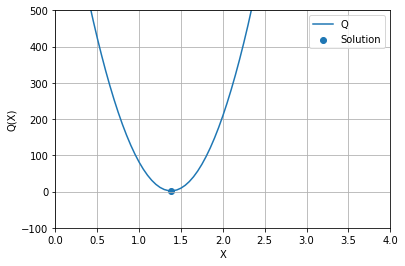

In [193]:
x = np.linspace(0, 10, 201)
y = 10*x - 14
z = 21*x - 29
plt.plot(x,Q(x, y, z), label = "Q")
plt.scatter(sol[0],Q(sol[0], 10*sol[0] - 14, 21*sol[0] - 29), label = "Solution")
plt.xlabel("X")
plt.ylabel("Q(X)")
plt.ylim(-100,500)
plt.xlim(0,4)
plt.legend()
plt.grid();

In [197]:
np.dot(A,sol).reshape(-1,1)

array([[ 1.],
       [12.]])

##### 6. Найдите одно из псевдорешений вырожденной системы, Попробуйте также отыскать и нормальное псевдорешение.:

$ 
\begin{align}
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 
\end{bmatrix} \cdot X =
\begin{bmatrix}
2 \\
5 \\
11 \\
\end{bmatrix}
\end{align}
$

In [246]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[2,5,11]])
C = np.concatenate((A,B.T),axis = 1) 

In [247]:
print(f"Determinant(A)= {np.linalg.det(A)} \nRank(A)= {np.linalg.matrix_rank(A)}\
            \nRank(C)= {np.linalg.matrix_rank(C)}")

Determinant(A)= 0.0 
Rank(A)= 2            
Rank(C)= 3


In [248]:
Q, R = np.linalg.qr(A)
print(Q)
print()
print(R)

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]

[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.88178420e-16]]


In [249]:
R1 = R[:2, :2]
B1 = np.dot(Q.T, B.reshape(-1,1))[:2]
B1

array([[-1.21860576e+01],
       [ 3.55271368e-15]])

In [250]:
sol = np.append(np.linalg.solve(R1, B1),0)

In [251]:
print("Pseudo solution by QR :\n", np.linalg.norm(sol), np.linalg.norm(np.dot(A, sol) - B))

Pseudo solution by QR :
 1.499999999999996 1.224744871391589


In [258]:
sol1 = np.linalg.lstsq(A, B.reshape(-1,1))[0]


In [260]:
print("Pseudo solution by lstsq :\n", np.linalg.norm(sol1),np.linalg.norm(np.dot(A, sol1)-B.reshape(-1,1)))

Pseudo solution by lstsq :
 1.3693063937629126 1.2247448713915892
